In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

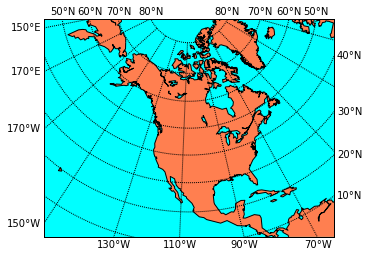

In [4]:
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
plt.show()

In [2]:
import csv
csv_file=open('201602.csv')
csv_reader_lines=csv.reader(csv_file)
lalo=[]
label=[]
number=1
for one_line in csv_reader_lines:
    if number == 189:
        break
    lalo.append(one_line[2:4])
    label.append(one_line[0])
    number=number+1
csv_file.close()

In [3]:
len(lalo)
for i in range(1,len(lalo)):
    lalo[i][0]=float(lalo[i][0])
    lalo[i][1]=float(lalo[i][1])
del lalo[0]
lalo

[[123.37, 42.94],
 [123.19, 42.88],
 [123.49, 42.77],
 [123.14, 42.76],
 [123.01, 42.69],
 [122.89, 42.67],
 [123.47, 42.68],
 [123.35, 42.7],
 [123.14, 42.65],
 [122.95, 42.62],
 [123.22, 42.63],
 [123.59, 42.64],
 [123.15, 42.57],
 [123.42, 42.55],
 [123.58, 42.55],
 [123.33, 42.55],
 [123.05, 42.51],
 [123.17, 42.5],
 [122.94, 42.48],
 [123.28, 42.44],
 [123.18, 42.41],
 [123.44, 42.5],
 [123.01, 42.35],
 [123.18, 42.34],
 [123.33, 42.32],
 [123.44, 42.32],
 [123.51, 42.51],
 [122.94, 42.24],
 [122.7, 42.22],
 [123.37, 42.2],
 [122.83, 42.15],
 [122.58, 42.14],
 [123.0, 42.16],
 [123.5, 42.11],
 [123.33, 42.1],
 [123.11, 42.07],
 [122.86, 42.06],
 [122.69, 42.04],
 [123.61, 42.02],
 [123.64, 42.01],
 [123.36, 42.01],
 [123.43, 42.01],
 [123.59, 41.95],
 [122.61, 41.97],
 [123.51, 41.94],
 [123.4, 41.93],
 [123.67, 41.92],
 [123.06, 41.91],
 [122.66, 41.88],
 [122.72, 41.93],
 [122.95, 41.86],
 [123.68, 41.85],
 [123.58, 41.85],
 [122.99, 41.82],
 [123.37, 41.83],
 [123.42, 41.8],
 [

In [6]:
len(lalo)

187

经度(lon)，维度(lat)
122.734467,41.497832  左下
124.095867,42.132659 右上

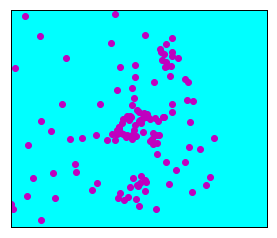

In [8]:
map = Basemap(llcrnrlon = 122.734467, llcrnrlat = 41.497832, urcrnrlon = 124.095867, urcrnrlat = 42.132659,
resolution = 'i', projection = 'tmerc', lat_0 = 20, lon_0 = 111)
map.drawmapboundary(fill_color = 'aqua')
#map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()

for i in range(187):
    x, y = map(lalo[i][0], lalo[i][1]) 
    map.scatter(x, y, marker = 'o', color = 'm') 

plt.show()


In [29]:
M_PI=3.14159265358979323846
import math
def MillierConvertion(lat, lon):
    L = 6381372 * M_PI * 2                                                    #地球周长  
    W = L                                        #平面展开后，x轴等于周长  
    H = L / 2                                    # y轴约等于周长一半  
    mill = 2.3                                   # 米勒投影中的一个常数，范围大约在正负2.3之间  
    x = lon * M_PI / 180                         # 将经度从度数转换为弧度  
    y = lat * M_PI / 180                         # 将纬度从度数转换为弧度  
    y = 1.25 * math.log(math.tan(0.25 * M_PI + 0.4 * y))   # 米勒投影的转换 
    # 弧度转为实际距离  
    x = (W / 2) + (W / (2 * M_PI)) * x
    y = (H / 2) - (H / (2 * mill)) * y
    result_x = int(x)
    result_y = int(y)
    return result_x,result_y

In [34]:
xy=np.zeros((187,2))
for i in range(187):
    xy[i][0],xy[i][1]=MillierConvertion(lalo[i][1],lalo[i][0])
xy

array([[ 33788122.,   6542274.],
       [ 33768074.,   6547800.],
       [ 33801487.,   6557924.],
       [ 33762506.,   6558844.],
       [ 33748027.,   6565280.],
       [ 33734662.,   6567118.],
       [ 33799260.,   6566199.],
       [ 33785895.,   6564361.],
       [ 33762506.,   6568956.],
       [ 33741344.,   6571712.],
       [ 33771416.,   6570793.],
       [ 33812625.,   6569874.],
       [ 33763619.,   6576303.],
       [ 33793691.,   6578139.],
       [ 33811511.,   6578139.],
       [ 33783667.,   6578139.],
       [ 33752482.,   6581810.],
       [ 33765847.,   6582728.],
       [ 33740230.,   6584563.],
       [ 33778098.,   6588232.],
       [ 33766961.,   6590982.],
       [ 33795918.,   6582728.],
       [ 33748027.,   6596481.],
       [ 33766961.,   6597397.],
       [ 33783667.,   6599229.],
       [ 33795918.,   6599229.],
       [ 33803715.,   6581810.],
       [ 33740230.,   6606554.],
       [ 33713500.,   6608384.],
       [ 33788122.,   6610214.],
       [ 3

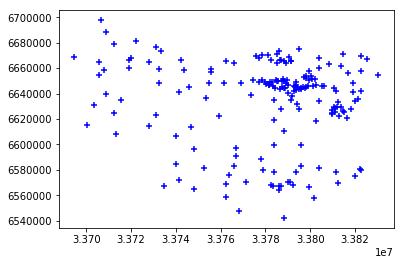

In [45]:
x=np.zeros(187)
y=np.zeros(187)
for i in range(187):
    x[i]=xy[i][0]
    y[i]=xy[i][1]
plt.scatter(x,y,marker='+',c='blue',label='pickup')
plt.show()

In [18]:
for i in range(187):
     # line是个list，取得所有需要的值
    lng= lalo[i][0] #将第一列city读取出来并清除不需要字符
    lat= lalo[i][1]#将第二列price读取出来并清除不需要字符
    str_temp = 'var marker'+str(i)+ '= new BMap.Marker(new BMap.Point(' + str(lng) + ',' + str(lat) +'));'
    print(str_temp) #也可以通过打印出来，把数据copy到百度热力地图api的相应位置上



var marker0= new BMap.Marker(new BMap.Point(123.37,42.94));
var marker1= new BMap.Marker(new BMap.Point(123.19,42.88));
var marker2= new BMap.Marker(new BMap.Point(123.49,42.77));
var marker3= new BMap.Marker(new BMap.Point(123.14,42.76));
var marker4= new BMap.Marker(new BMap.Point(123.01,42.69));
var marker5= new BMap.Marker(new BMap.Point(122.89,42.67));
var marker6= new BMap.Marker(new BMap.Point(123.47,42.68));
var marker7= new BMap.Marker(new BMap.Point(123.35,42.7));
var marker8= new BMap.Marker(new BMap.Point(123.14,42.65));
var marker9= new BMap.Marker(new BMap.Point(122.95,42.62));
var marker10= new BMap.Marker(new BMap.Point(123.22,42.63));
var marker11= new BMap.Marker(new BMap.Point(123.59,42.64));
var marker12= new BMap.Marker(new BMap.Point(123.15,42.57));
var marker13= new BMap.Marker(new BMap.Point(123.42,42.55));
var marker14= new BMap.Marker(new BMap.Point(123.58,42.55));
var marker15= new BMap.Marker(new BMap.Point(123.33,42.55));
var marker16= new BMap.Marker(new B

In [19]:
for i in range(187):
    str_temp = 'map.addOverlay(marker'+str(i)+ ');'
    print(str_temp) #也可以通过打印出来，把数据copy到百度热力地图api的相应位置上

map.addOverlay(marker0);
map.addOverlay(marker1);
map.addOverlay(marker2);
map.addOverlay(marker3);
map.addOverlay(marker4);
map.addOverlay(marker5);
map.addOverlay(marker6);
map.addOverlay(marker7);
map.addOverlay(marker8);
map.addOverlay(marker9);
map.addOverlay(marker10);
map.addOverlay(marker11);
map.addOverlay(marker12);
map.addOverlay(marker13);
map.addOverlay(marker14);
map.addOverlay(marker15);
map.addOverlay(marker16);
map.addOverlay(marker17);
map.addOverlay(marker18);
map.addOverlay(marker19);
map.addOverlay(marker20);
map.addOverlay(marker21);
map.addOverlay(marker22);
map.addOverlay(marker23);
map.addOverlay(marker24);
map.addOverlay(marker25);
map.addOverlay(marker26);
map.addOverlay(marker27);
map.addOverlay(marker28);
map.addOverlay(marker29);
map.addOverlay(marker30);
map.addOverlay(marker31);
map.addOverlay(marker32);
map.addOverlay(marker33);
map.addOverlay(marker34);
map.addOverlay(marker35);
map.addOverlay(marker36);
map.addOverlay(marker37);
map.addOverlay(marker3

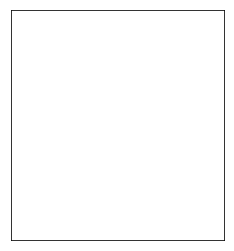

In [9]:
map = Basemap(projection = 'cyl')
map.drawmapboundary(fill_color = 'aqua')
map.fillcontinents(color = 'coral', lake_color = 'aqua')
map.drawcoastlines()






m = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

xs = []
ys = []
for i in lalo:
    NYClat, NYClon = lalo[0], lalo[1]
    xpt, ypt = m(NYClon, NYClat)
    xs.append(xpt)
    ys.append(ypt)
    m.plot(xpt, ypt, 'c*', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')

plt.show()

/home/hp123/anaconda2/envs/basemap/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/hp123/anaconda2/envs/basemap/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


26.223411


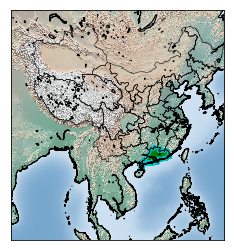

In [11]:
import time

start = time.clock()

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = map.readshapefile("/home/hp123/chinamap/CHN_adm1",'states',drawbounds=True) # CHN_adm1的数据是中国各省区域

for info, shp in zip(map.states_info, map.states):
    proid = info['NAME_1']  # 可以用notepad打开CHN_adm1.csv文件，可以知道'NAME_1'代表各省的名称
    if proid == 'Guangdong':
        poly = Polygon(shp,facecolor='g',edgecolor='c', lw=3) # 绘制广东省区域
        ax1.add_patch(poly)
        
        
map.shadedrelief() # 绘制阴暗的浮雕图

map.drawcoastlines()
end=time.clock()
print(end-start)
plt.show()